In [1]:
import os
os.chdir("E:/K")
import pandas as pd
import matplotlib.pyplot as plt
train_df=pd.read_csv("train_cab.csv")
print(train_df.isnull().sum())
import seaborn as sns


fare_amount          24
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64


In [2]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(train_df.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(train_df))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

#save output results 
missing_val.to_csv("Miising_perc1.csv", index = False)
df=train_df.dropna()

In [3]:
#### I deleted row which are not in the format of date
k=len(df.iloc[2345,1])
for i in range(0,len(df)-1):
    if(len(df.iloc[i,1])!=k):
        u=i;
print(u)
import numpy as na
df.iloc[u,1]=na.nan

1279


C:\Users\Uma Pathi\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [4]:
df["fare_amount"] = df["fare_amount"].convert_objects(convert_numeric=True)
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'],infer_datetime_format=True)
df['pickup_hour'] = df.pickup_datetime.dt.hour
df['pickup_date'] =  df.pickup_datetime.dt.day
df['pickup_day_of_week'] =  df.pickup_datetime.dt.dayofweek
df['pickup_month'] =  df.pickup_datetime.dt.month
df['pickup_year'] =  df.pickup_datetime.dt.year


C:\Users\Uma Pathi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
C:\Users\Uma Pathi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Uma Pathi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [5]:
print(df.isnull().sum())
df=df.dropna()
df.dtypes

fare_amount           1
pickup_datetime       1
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
pickup_hour           1
pickup_date           1
pickup_day_of_week    1
pickup_month          1
pickup_year           1
dtype: int64


fare_amount                  float64
pickup_datetime       datetime64[ns]
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
passenger_count              float64
pickup_hour                  float64
pickup_date                  float64
pickup_day_of_week           float64
pickup_month                 float64
pickup_year                  float64
dtype: object

In [6]:
import numpy as np
# Convert lons and lats into cartesian coordinates. Assume the earth as sphere not ellipsoid
R = 6371000 # Approximate mean radius of earth (in m)
 # lons and lats must be in radians
lon1,lat1,lon2,lat2 = map(np.radians, [df.pickup_longitude, df.pickup_latitude, df.dropoff_longitude, df.dropoff_latitude])
df['pickup_x'] = R*np.cos(lon1)*np.cos(lat1)
df['pickup_y'] = R*np.sin(lon1)*np.cos(lat1)
df['dropoff_x'] = R*np.cos(lon2)*np.cos(lat2)
df['dropoff_y'] = R*np.sin(lon2)*np.cos(lat2)

# Now calculate the euclidean distance
x1 = df['pickup_x']
y1 = df['pickup_y']
x2 = df['dropoff_x']
y2 = df['dropoff_y']
df['euclidean_distance'] = (np.sqrt(( x1 - x2)**2 + ( y1 - y2)**2))/1000 # in km

In [7]:
df['abs_lon_diff'] = np.abs(df.pickup_longitude - df.dropoff_longitude)
df['abs_lat_diff'] = np.abs(df.pickup_latitude - df.dropoff_latitude)

In [8]:
######### calculate the |x1 - x2| + |y1 - y2|
df["absolute_distance"]=(np.abs(x1 - x2) + np.abs(y1 - y2))/1000 # in km

In [9]:
# Calculate great circle distance using haversine formula
def great_circle_distance(lon1,lat1,lon2,lat2):
    R = 6371000 # Approximate mean radius of earth (in m)
    
    # Convert decimal degrees to ridians
    lon1,lat1,lon2,lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    
    # Distance of lons and lats in radians
    dis_lon = lon2 - lon1
    dis_lat = lat2 - lat1
    
    # Haversine implementation
    a = np.sin(dis_lat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dis_lon/2)**2
    c = 2*np.arctan2(np.sqrt(a), np.sqrt(1-a))
    dis_m = R*c # Distance in meters
    dis_km = dis_m/1000 # Distance in km
    return dis_km

# Create a column named greate_circle_distance
df['great_circle_distance'] = great_circle_distance(df.pickup_longitude, df.pickup_latitude, df.dropoff_longitude, df.dropoff_latitude)

In [59]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_date,pickup_day_of_week,...,pickup_year,pickup_x,pickup_y,dropoff_x,dropoff_y,euclidean_distance,abs_lon_diff,abs_lat_diff,absolute_distance,great_circle_distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,17.0,15.0,0.0,...,2009.0,1.343530e+06,-4.637845e+06,1.343931e+06,-4.638412e+06,0.694173,0.002701,0.009041,0.967674,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,16.0,5.0,1.0,...,2010.0,1.329823e+06,-4.642550e+06,1.331386e+06,-4.636763e+06,5.994265,0.036780,0.070701,7.350444,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,0.0,18.0,3.0,...,2011.0,1.331521e+06,-4.638291e+06,1.331047e+06,-4.639236e+06,1.057022,0.008504,0.010708,1.418821,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,4.0,21.0,5.0,...,2012.0,1.331729e+06,-4.640355e+06,1.330870e+06,-4.638718e+06,1.848904,0.004437,0.024949,2.496108,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,7.0,9.0,1.0,...,2010.0,1.332571e+06,-4.637480e+06,1.333181e+06,-4.636114e+06,1.495617,0.011440,0.015754,1.975419,1.999157
5,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1.0,9.0,6.0,3.0,...,2011.0,1.330638e+06,-4.640782e+06,1.332379e+06,-4.638274e+06,3.052946,0.028072,0.026603,4.248722,3.787239
6,7.5,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1.0,20.0,20.0,1.0,...,2012.0,1.331935e+06,-4.638898e+06,1.332173e+06,-4.637834e+06,1.090040,0.006200,0.013180,1.301598,1.555807
7,16.5,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1.0,17.0,4.0,2.0,...,2012.0,1.333807e+06,-4.636662e+06,1.331130e+06,-4.639175e+06,3.672324,0.038795,0.023090,5.190860,4.155444
9,8.9,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2.0,1.0,2.0,2.0,...,2009.0,1.332238e+06,-4.640154e+06,1.330871e+06,-4.638714e+06,1.985410,0.010882,0.024265,2.806848,2.849627
10,5.3,2012-04-08 07:30:50,-73.996335,40.737142,-73.980721,40.733559,1.0,7.0,8.0,6.0,...,2012.0,1.330903e+06,-4.640290e+06,1.332239e+06,-4.640177e+06,1.341016,0.015614,0.003583,1.449220,1.374577


In [10]:
cnames=["fare_amount","pickup_longitude","pickup_latitude","dropoff_longitude","passenger_count","pickup_x","pickup_y",
       "dropoff_x","dropoff_y","euclidean_distance","abs_lat_diff","absolute_distance","great_circle_distance"]

In [11]:

df.drop(["pickup_datetime"], axis = 1, inplace = True) 

{'whiskers': [<matplotlib.lines.Line2D at 0x17834da74a8>,
 'caps': [<matplotlib.lines.Line2D at 0x17834da7b38>,
 'boxes': [<matplotlib.lines.Line2D at 0x17834da7320>],
 'medians': [<matplotlib.lines.Line2D at 0x17834dc0208>],
 'fliers': [<matplotlib.lines.Line2D at 0x17834dc0550>],
 'means': []}

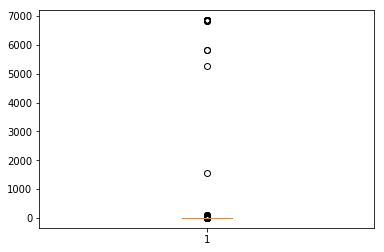

In [12]:
# #Plot boxplot to visualize Outliers
%matplotlib inline  
plt.boxplot(df['euclidean_distance'])

In [13]:
df.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_date,pickup_day_of_week,pickup_month,pickup_year,pickup_x,pickup_y,dropoff_x,dropoff_y,euclidean_distance,abs_lon_diff,abs_lat_diff,absolute_distance,great_circle_distance
0.0,-3.0,-74.438233,-74.006893,-74.429332,-74.006377,0.0,0.0,1.0,0.0,1.0,2009.0,1.290076e+06,-4.717438e+06,1.300405e+06,-6.123737e+06,0.000000,0.000000,0.000000,0.000000,0.000000
0.1,4.5,-74.002794,40.718053,-74.002668,40.713802,1.0,3.0,4.0,0.0,2.0,2009.0,1.330457e+06,-4.641351e+06,1.330470e+06,-4.641469e+06,0.570461,0.001832,0.002361,0.711373,0.717685
0.2,5.5,-73.994706,40.730155,-73.993742,40.728747,1.0,8.0,7.0,1.0,3.0,2010.0,1.330896e+06,-4.640575e+06,1.330974e+06,-4.640560e+06,0.839611,0.004498,0.005283,1.063233,1.060853
0.3,6.5,-73.990091,40.739689,-73.988985,40.739635,1.0,10.0,10.0,2.0,4.0,2010.0,1.331233e+06,-4.639925e+06,1.331295e+06,-4.639842e+06,1.090059,0.006992,0.007979,1.383481,1.367007
0.4,7.3,-73.985685,40.746697,-73.984268,40.747671,1.0,12.0,13.0,2.0,5.0,2011.0,1.331481e+06,-4.639296e+06,1.331575e+06,-4.639223e+06,1.367759,0.009548,0.010800,1.728703,1.723074
0.5,8.5,-73.981691,40.752603,-73.980168,40.753549,1.0,14.0,16.0,3.0,6.0,2012.0,1.331772e+06,-4.638746e+06,1.331894e+06,-4.638676e+06,1.686843,0.012524,0.013914,2.138373,2.125345
0.6,9.5,-73.977129,40.758933,-73.975428,40.759187,1.0,16.0,19.0,4.0,7.0,2012.0,1.332098e+06,-4.638265e+06,1.332216e+06,-4.638192e+06,2.066022,0.016015,0.017883,2.640569,2.639480
0.7,11.3,-73.971032,40.764023,-73.968745,40.764286,1.0,18.0,22.0,4.0,9.0,2013.0,1.332492e+06,-4.637803e+06,1.332641e+06,-4.637676e+06,2.593473,0.020868,0.023140,3.367040,3.357515
0.8,14.1,-73.961858,40.771035,-73.958345,40.772358,2.0,20.0,25.0,5.0,10.0,2014.0,1.333051e+06,-4.636988e+06,1.333310e+06,-4.636822e+06,3.495622,0.028100,0.031233,4.499504,4.531008
0.9,20.5,-73.950814,40.779992,-73.944362,40.782722,4.0,22.0,28.0,6.0,11.0,2014.0,1.333876e+06,-4.636077e+06,1.334398e+06,-4.635848e+06,5.462848,0.044452,0.046601,6.993811,7.056847


In [14]:
# #Detect and delete outliers from data
import numpy as np
for i in cnames:
    print(i)
    q75, q25 = np.percentile(df.loc[:,i], [75 ,25])
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    df = df.drop(df[df.loc[:,i] < min].index)
    df = df.drop(df[df.loc[:,i] > max].index)

fare_amount
-3.75
22.25
pickup_longitude
-74.02811528750001
-73.9329231875
pickup_latitude
40.69344149999999
40.81092150000002
dropoff_longitude
-74.0257995
-73.93526750000001
passenger_count
-0.5
3.5
pickup_x
1328838.8212662907
1334614.4857598804
pickup_y
-4643949.882121183
-4633905.691183999
dropoff_x
1328854.8944073077
1334724.5853021266
dropoff_y
-4643955.640122281
-4633718.448023008
euclidean_distance
-1.2412316595081716
4.545835002217231
abs_lat_diff
-0.016756662499983754
0.04493479749998652
absolute_distance
-1.3432410617844437
5.282184230070445
great_circle_distance
-1.2487731351372993
5.099893658078161


{'whiskers': [<matplotlib.lines.Line2D at 0x178352d2f98>,
 'caps': [<matplotlib.lines.Line2D at 0x178352f5668>,
 'boxes': [<matplotlib.lines.Line2D at 0x178352d2e48>],
 'medians': [<matplotlib.lines.Line2D at 0x178352f5cf8>],
 'fliers': [<matplotlib.lines.Line2D at 0x178352ff080>],
 'means': []}

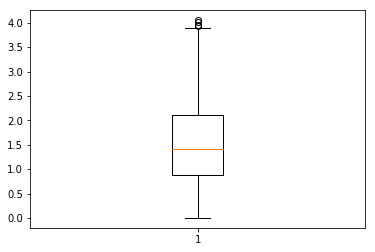

In [15]:
plt.boxplot(df['euclidean_distance'])

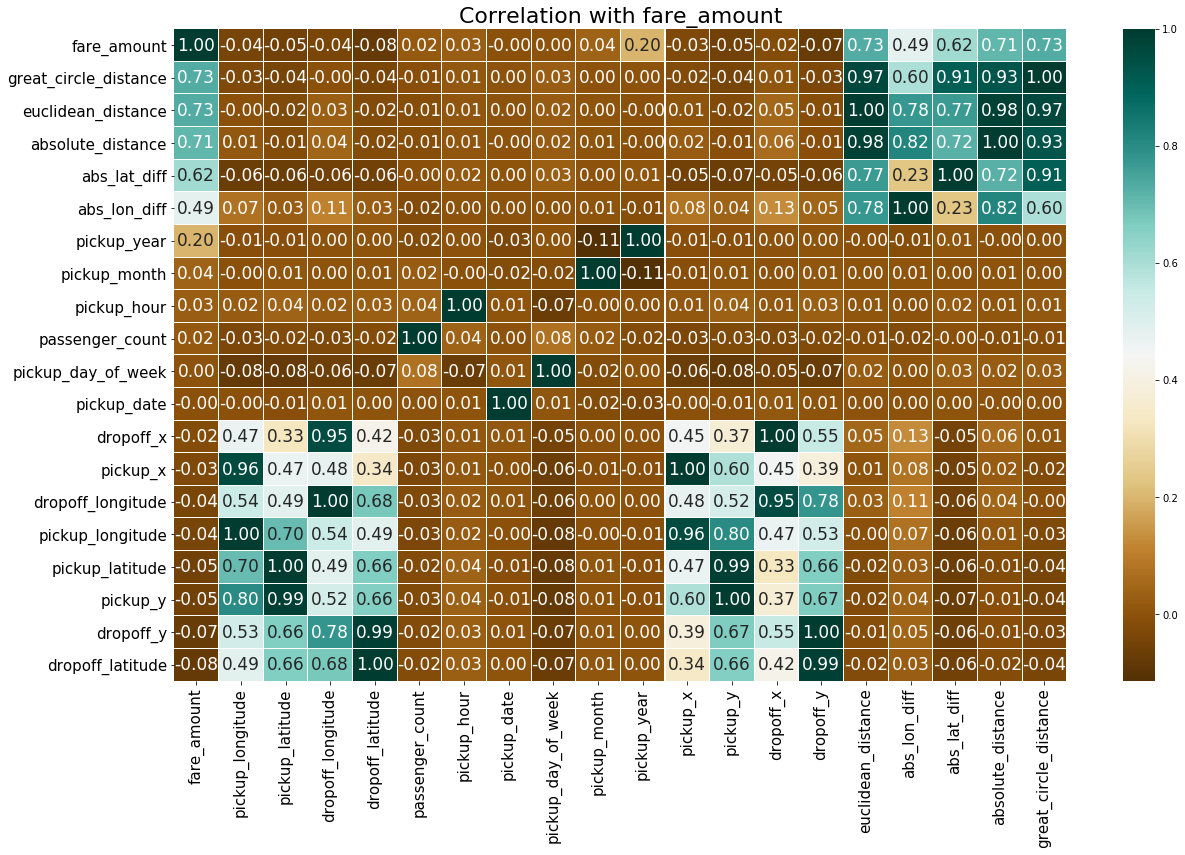

In [16]:
# Let's see which variables have the strongest and weakest correlation with fare_amount
corr = df.corr().sort_values(by='fare_amount', ascending=False)
fig, ax = plt.subplots(figsize = (20,12))
sns.heatmap(corr, annot = True, cmap ='BrBG', ax = ax, fmt='.2f', linewidths = 0.05, annot_kws = {'size': 17})
ax.tick_params(labelsize = 15)
ax.set_title('Correlation with fare_amount', fontsize = 22)
plt.show()

In [17]:
##########trianing
from sklearn.model_selection import train_test_split
train2, test2 = train_test_split(df, test_size=0.2)

In [18]:
from sklearn.tree import DecisionTreeRegressor
#Decision tree for regression
fit_DT = DecisionTreeRegressor(max_depth=2).fit(train2.iloc[:,1:20], train2.iloc[:,0])

#Apply model on test data
predictions_DT = fit_DT.predict(test2.iloc[:,1:20])

In [19]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape
#Calculate MAPE
MAPE(test2.iloc[:,0],predictions_DT )


21.102976106835907

In [20]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse_val = rmse(test2.iloc[:,0],predictions_DT)
print("rms error is: " + str(rmse_val))

rms error is: 2.224451263995501


In [21]:
import statsmodels.api as sm

# Train the model using the training sets
model = sm.OLS(train2.iloc[:,0], train2.iloc[:,1:20]).fit()


# Print out the statistics
model.summary()


# make the predictions by the model
predictions_LRk = model.predict(test2.iloc[:,1:20]) 


#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape
#Calculate MAPE
MAPE(test2.iloc[:,0], predictions_LRk)

17.80537447530667

In [22]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse_val = rmse(test2.iloc[:,0],predictions_LRk)
print("rms error is: " + str(rmse_val))

rms error is: 1.9813833265094416


In [23]:
##### Random forest
x_train = train2.iloc[:, train2.columns != 'fare_amount']
y_train = train2['fare_amount'].values
x_test=test2.iloc[:, test2.columns != 'fare_amount']
y_test=test2['fare_amount'].values



from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rf_predict = rf.predict(x_test)

C:\Users\Uma Pathi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [24]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape
#Calculate MAPE
MAPE(y_test,rf_predict )

17.510522803805024

In [25]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse_val = rmse(y_test,rf_predict)
print("rms error is: " + str(rmse_val))


rms error is: 1.9253821846303052


In [26]:
###########preparing test data to predicting
test_df=pd.read_csv("test.csv")

In [27]:
import seaborn as sns
dft=test_df.dropna()
print(dft.isnull().sum())

dft.dtypes

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [28]:
dft['pickup_datetime']=pd.to_datetime(dft['pickup_datetime'],infer_datetime_format=True)
dft['pickup_hour'] = dft.pickup_datetime.dt.hour
dft['pickup_date'] =  dft.pickup_datetime.dt.day
dft['pickup_day_of_week'] =  dft.pickup_datetime.dt.dayofweek
dft['pickup_month'] =  dft.pickup_datetime.dt.month
dft['pickup_year'] =  dft.pickup_datetime.dt.year
dft.drop(["pickup_datetime"], axis = 1, inplace = True) 

In [29]:
R = 6371000 # Approximate mean radius of earth (in m)
 # lons and lats must be in radians
lon1t,lat1t,lon2t,lat2t = map(np.radians, [dft.pickup_longitude, dft.pickup_latitude, dft.dropoff_longitude, dft.dropoff_latitude])
dft['pickup_x'] = R*np.cos(lon1t)*np.cos(lat1t)
dft['pickup_y'] = R*np.sin(lon1t)*np.cos(lat1t)
dft['dropoff_x'] = R*np.cos(lon2t)*np.cos(lat2t)
dft['dropoff_y'] = R*np.sin(lon2t)*np.cos(lat2t)

# Now calculate the euclidean distance
x1t = dft['pickup_x']
y1t = dft['pickup_y']
x2t = dft['dropoff_x']
y2t = dft['dropoff_y']
dft['euclidean_distance'] = (np.sqrt(( x1t - x2t)**2 + ( y1t - y2t)**2))/1000 # in km

In [30]:
dft['abs_lon_diff'] = np.abs(dft.pickup_longitude - dft.dropoff_longitude)
dft['abs_lat_diff'] = np.abs(dft.pickup_latitude - dft.dropoff_latitude)


In [31]:
######### calculate the |x1 - x2| + |y1 - y2|
dft["absolute_distance"]=(np.abs(x1t - x2t) + np.abs(y1t - y2t))/1000 # in km

In [32]:
# Calculate great circle distance using haversine formula
def great_circle_distance(lon1t,lat1,lon2,lat2):
    R = 6371000 # Approximate mean radius of earth (in m)
    
    # Convert decimal degrees to ridians
    lon1t,lat1t,lon2t,lat2t = map(np.radians, [lon1, lat1, lon2, lat2])
    
    # Distance of lons and lats in radians
    dis_lont = lon2t - lon1t
    dis_latt = lat2t - lat1t
    
    # Haversine implementation
    at = np.sin(dis_latt/2)**2 + np.cos(lat1t) * np.cos(lat2t) * np.sin(dis_lont/2)**2
    ct = 2*np.arctan2(np.sqrt(at), np.sqrt(1-at))
    dis_mt = R*ct # Distance in meters
    dis_kmt = dis_mt/1000 # Distance in km
    return dis_kmt

# Create a column named greate_circle_distance
dft['great_circle_distance'] = great_circle_distance(dft.pickup_longitude, dft.pickup_latitude, dft.dropoff_longitude, dft.dropoff_latitude)

In [33]:
dfk=dft.dropna()

In [34]:
print(dft.isnull().sum())

pickup_longitude          0
pickup_latitude           0
dropoff_longitude         0
dropoff_latitude          0
passenger_count           0
pickup_hour               0
pickup_date               0
pickup_day_of_week        0
pickup_month              0
pickup_year               0
pickup_x                  0
pickup_y                  0
dropoff_x                 0
dropoff_y                 0
euclidean_distance        0
abs_lon_diff              0
abs_lat_diff              0
absolute_distance         0
great_circle_distance    80
dtype: int64


In [35]:
print(dfk.isnull().sum())
print(df.isnull().sum())

pickup_longitude         0
pickup_latitude          0
dropoff_longitude        0
dropoff_latitude         0
passenger_count          0
pickup_hour              0
pickup_date              0
pickup_day_of_week       0
pickup_month             0
pickup_year              0
pickup_x                 0
pickup_y                 0
dropoff_x                0
dropoff_y                0
euclidean_distance       0
abs_lon_diff             0
abs_lat_diff             0
absolute_distance        0
great_circle_distance    0
dtype: int64
fare_amount              0
pickup_longitude         0
pickup_latitude          0
dropoff_longitude        0
dropoff_latitude         0
passenger_count          0
pickup_hour              0
pickup_date              0
pickup_day_of_week       0
pickup_month             0
pickup_year              0
pickup_x                 0
pickup_y                 0
dropoff_x                0
dropoff_y                0
euclidean_distance       0
abs_lon_diff             0
abs_lat_diff   

In [36]:
rf_predict = rf.predict(dfk)

In [49]:
pd.DataFrame(rf_predict).to_csv("rf.csv")

array([10.5 , 11.85,  8.71, ..., 14.7 , 13.3 ,  8.25])